# **Not an ideal network**

Install and import Keras

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Import all the required packages

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Download and import MNIST dataset in X-train, y_train, X_test and y_test variables. X_train and X_test contain the images and y_train and y_test represent respective labels.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Print the shape (Array size) of X_train variable - 60000 images and each has 28*28 shape

Import matplotlib and show one of the image

(60000, 28, 28)


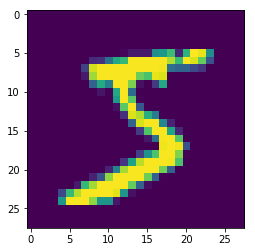

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshape X_train and X_test from 3 dimensional array to 4 dimensional array without impacting number of images and size of each image.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Change datatype of array from integer to flot (to accomodate decimal values)

Normalize array values by dividing with 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

There are 10 classes in MNIST dataset. Convert the labels from 1-dimensional array with value of classes to 10 dimensional array of categorical matrix (similar to one hot encoding)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Define CNN Model and print summary of the model

In [10]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #28*28*3|3*3*3*32 --> 26*26*32 (Receptive field 3*3)
model.add(Convolution2D(64, 3, 3, activation='relu')) #26*26*32|3*3*32*64 --> 24*24*64 (Receptive field 5*5)
model.add(Convolution2D(128, 3, 3, activation='relu')) #24*24*64|3*3*64*128 --> 22*22*128 (Receptive field 7*7)

model.add(MaxPooling2D(pool_size=(2, 2))) #22*22*128 --> 11*11*128 (Receptive field 8*8)

model.add(Convolution2D(256, 3, 3, activation='relu')) #11*11*128|3*3*128*256 --> 9*9*256 (Receptive field 12*12)
model.add(Convolution2D(512, 3, 3, activation='relu')) #9*9*256|3*3*256*512 --> 7*7*512 (Receptive field 16*16)
model.add(Convolution2D(1024, 3, 3, activation='relu')) #7*7*512|3*3*512*1024 --> 5*5*1024 (Receptive field 20*20)
model.add(Convolution2D(2048, 3, 3, activation='relu')) #5*5*1024|3*3*1024*2048 --> 3*3*2048 (Receptive field 24*24)
model.add(Convolution2D(10, 3, 3, activation='relu')) #3*3*2048|3*3*2048*10 --> 1*1*10 (Receptive field 28*28)

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0730 05:54:23.209583 140025528588160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0730 05:54:23.230942 140025528588160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 05:54:23.234148 140025528588160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  


Compile the model defined by defining loss type and optimizer.

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0730 05:54:23.361404 140025528588160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 05:54:23.387815 140025528588160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Train the model on training dataset (X_train and Y_train) for 10 epochs with a batch size of 32

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0730 05:54:23.580925 140025528588160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 05:54:23.668004 140025528588160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 2.2754 - acc: 0.1121
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

Evaluate model accuracy on test dataset (X_test and Y_test)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print Accuracy

In [14]:
print(score)

[2.3025851249694824, 0.098]


Predict the labels on the test data set

In [0]:
y_pred = model.predict(X_test)

Print Predicted labels and actual labels

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


#Problem with the given network

As shown in the Last cell, the model output is predicting all the classes with equal probability. This shows that the model has not been able to learn. Also the training log shows that the accuracy stopped at less than 10% and accuracy does not improve further.

The primary reason for this problem is use of activation function (relu) in the last convolution layer. It is not advisable to use relu in the last convolution layer.

In case we change following line to the below line, model learns very fast. 
The accuracy for the training dataset improves to more than 90% in first epoch itself.

model.add(Convolution2D(10, 3, 3, activation='relu')) #3*3*2048|3*3*2048*10 --> 1*1*10 (Receptive field 28*28)

model.add(Convolution2D(10, 3, 3) #3*3*2048|3*3*2048*10 --> 1*1*10 (Receptive field 28*28)